# Problem Steatment:
- Check the number of seats per car in Parc
- Look for outliers
- Normalize the data using Standard Deviation

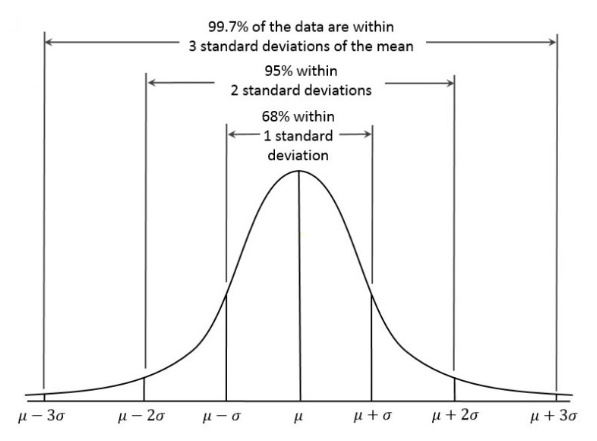

In [1]:
# Load Parc data related tot eh number of Cars:
import pandas as pd
df = pd.read_csv('C:\\Users\\alvesd.SMMT\\OneDrive - smmt.co.uk\\Desktop\\Diego_work_folder\\Jupyter_Note_Book\\Number of Seats\\Parc_Cars.csv',encoding='unicode_escape')

In [2]:
df.head()

,Make,Range,Number_of_Seats,Registrations
0,ABARTH,124,1,1866
1,ABARTH,500,1,50
2,ABARTH,500,3,28841
3,ABARTH,500,4,1
4,ABARTH,PUNTO,3,289


In [3]:
df.groupby(["Make", "Number_of_Seats", "Registrations"])["Range"].count()

Make      Number_of_Seats  Registrations
ABARTH    1                1                1
                           50               1
                           1866             1
          3                289              1
                           387              1
                                           ..
WOLSELEY  6                1                1
ZASTAVA   0                1                1
                           12               1
          3                14               1
          4                1                1
Name: Range, Length: 4735, dtype: int64

In [4]:
print("Mean value of Number_of_Seats",df.Number_of_Seats.mean())
print("Standard deviation of Number_of_Seats",df.Number_of_Seats.std())
print("Minimum value of Number_of_Seats",df.Number_of_Seats.min())
print("Maximum value of Number_of_Seats",df.Number_of_Seats.max())

Mean value of Number_of_Seats 3.4663813090779385
Standard deviation of Number_of_Seats 6.96056130221894
Minimum value of Number_of_Seats 0
Maximum value of Number_of_Seats 194


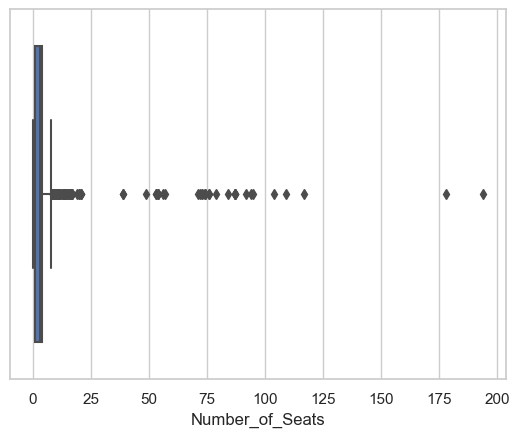

In [5]:
# Boxplot the number of seat for better outliers view: 
import seaborn as sns
sns.set(style='whitegrid')
ax = sns.boxplot(x=df["Number_of_Seats"])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Number_of_Seats', ylabel='Registrations'>

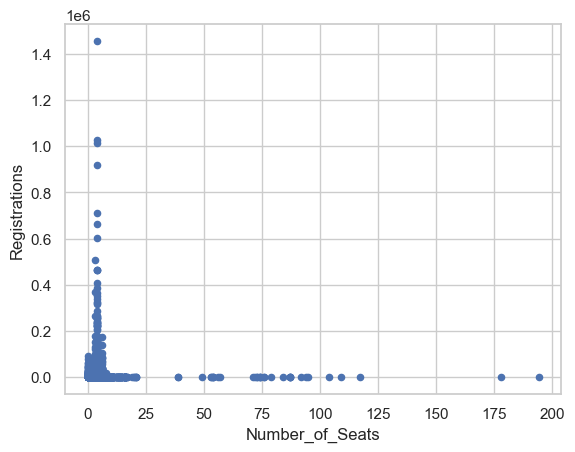

In [6]:
df.plot('Number_of_Seats', 'Registrations', kind = 'scatter')

In [7]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
df = pd.read_csv('C:\\Users\\alvesd.SMMT\\OneDrive - smmt.co.uk\\Desktop\\Diego_work_folder\\Jupyter_Note_Book\\Number of Seats\\Parc_Cars.csv',encoding='unicode_escape')

### We will start the process of finding outliers by running the summary statistics on the variables. This is done using the describe() function below, which provides a statistical summary of all the quantitative variables.

In [8]:
df.describe()

,Number_of_Seats,Registrations
count,5607.000000,5.607000e+03
mean,3.466381,6.268601e+03
std,6.960561,4.358521e+04
min,0.000000,1.000000e+00
25%,1.000000,2.000000e+00
50%,3.000000,1.600000e+01
75%,4.000000,3.100000e+02
max,194.000000,1.454614e+06


### The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1. The lines of code below calculate and print the interquartile range for each of the variables in the dataset. 
### The below output prints the IQR scores, which can be used to detect outliers. 

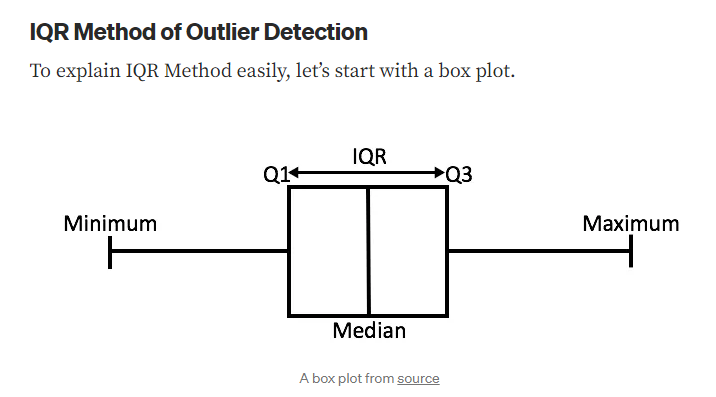

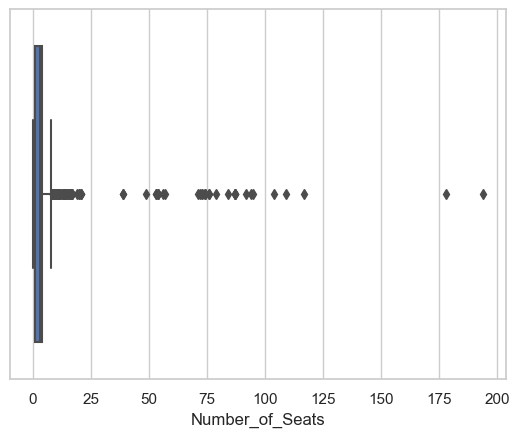

In [9]:
import seaborn as sns
sns.set(style='whitegrid')
ax = sns.boxplot(x=df["Number_of_Seats"])

### Calculate mean, standard deviation: https://www.analyticsvidhya.com/blog/2022/08/dealing-with-outliers-using-the-z-score-method/

In [10]:
mean = np.mean(df.Number_of_Seats)
std = np.std(df.Number_of_Seats)
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is 3.4663813090779385
std. deviation is 6.959940571731933


### Calculate Z score. If Z score>3, print it as an outlier.
### Conclusion: Z score helps us identify outliers in the data.

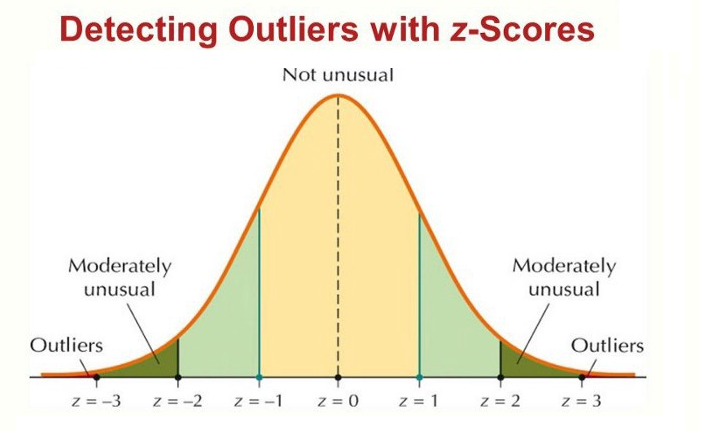

In [11]:
threshold = 3
outlier = []
for i in df.Number_of_Seats:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('outlier in dataset is', outlier)

outlier in dataset is [73, 74, 54, 56, 39, 94, 95, 54, 73, 76, 49, 194, 109, 178, 53, 71, 104, 74, 87, 84, 39, 117, 57, 72, 76, 92, 87, 79, 87, 87, 74, 53, 54]


### The very first step will be setting the upper and lower limit. This range stimulates that every data point will be regarded as an outlier out of this range. Let’s see the formulae for both upper and lower limits.

In [12]:
print("Upper limit",df.Number_of_Seats.mean() + 17*df.Number_of_Seats.std())
print("Lower limit",df.Number_of_Seats.mean() - 0.2*df.Number_of_Seats.std())

Upper limit 121.79592344679992
Lower limit 2.07426904863415


### The second step is to detect how many outliers are there in the dataset based on the upper and lower limit that we set up just

In [13]:
df[(df.Number_of_Seats > 73.07) | (df.Number_of_Seats < 2.07)]

,Make,Range,Number_of_Seats,Registrations
0,ABARTH,124,1,1866
1,ABARTH,500,1,50
6,ABARTH,PUNTO EVO,1,1
9,AC,ALL MODELS,0,328
10,AC,ALL MODELS,1,6
...,...,...,...,...
5596,WOLSELEY,SIX,0,59
5598,WOLSELEY,UNSPECIFIED,0,780
5599,WOLSELEY,UNSPECIFIED,1,6
5605,ZASTAVA,YUGO,0,12


## Capping
### Capping is another technique for dealing with bad data points; it is useful when we have many outliers, and removing a good amount of data from the dataset is not good. In that case, capping comes into the picture as it won’t remove them. Instead, it brings back those data points within the range we specified according to our Z-Score value.

In [14]:
upper_limit = df.Number_of_Seats.mean() + 10*df.Number_of_Seats.std()
lower_limit = df.Number_of_Seats.mean() - 0.2*df.Number_of_Seats.std()

df.Number_of_Seats = np.where(
    df.Number_of_Seats>upper_limit,
    upper_limit,
    np.where(
        df.Number_of_Seats<lower_limit,
        lower_limit,
        df.Number_of_Seats
    )
)

### Inference: Now, if we compare the minimum and maximum values before outlier removal and after, we can see that the minimum value is increased and the maximum value is decreased.

In [15]:
df.Number_of_Seats.describe()

count    5607.000000
mean        3.960579
std         5.284342
min         2.074269
25%         2.074269
50%         3.000000
75%         4.000000
max        73.071994
Name: Number_of_Seats, dtype: float64

Conclusion
In this article, we discussed one of the efficient ways of dealing with and removing the bad data for our further analysis, i.e., removing outliers, also known as Anamoly detection. Here we saw how statistical measures such as Z-Score can help deal with such problems.

Firstly we started by importing libraries, reading the dataset, and having a brief look over it. Before that, we also discussed the limitations of Z-Score and when we should prefer it.
Then we analyze the data distribution of the columns to choose the normally distributed column as Z-Score only applies to that type. As a result, GPA seems to be fit for further analysis.
At last, we discussed two methods via which we can do the Anamoly detection: Trimming (removing outliers) and Capping (imputing outliers).

In [16]:
# Convert single column to int dtype.
df["Number_of_Seats"] = df["Number_of_Seats"].astype('int')

In [17]:
df.to_csv("C:\\Users\\alvesd.SMMT\\OneDrive - smmt.co.uk\\Desktop\\Diego_work_folder\\Jupyter_Note_Book\\Number of Seats\\Removed_Outliers_Parc_Cars.csv", index=False)

In [18]:
df.groupby(["Make", "Number_of_Seats", "Registrations"])["Range"].count()

Make      Number_of_Seats  Registrations
ABARTH    2                1                1
                           50               1
                           1866             1
          3                289              1
                           387              1
                                           ..
WOLSELEY  6                1                1
ZASTAVA   2                1                1
                           12               1
          3                14               1
          4                1                1
Name: Range, Length: 4535, dtype: int64

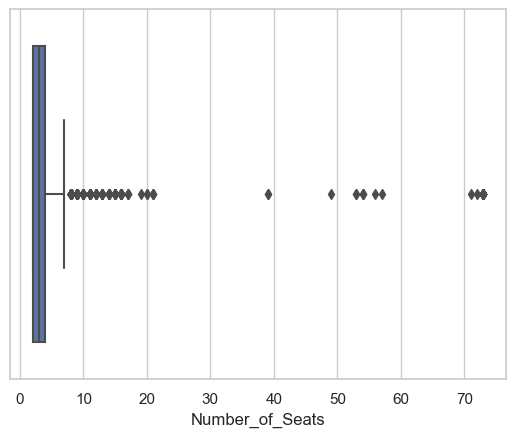

In [19]:
# Boxplot the number of seat for better outliers view: 
import seaborn as sns
sns.set(style='whitegrid')
ax = sns.boxplot(x=df["Number_of_Seats"])